In [1]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [8]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [3]:
sept_perc = sept_ts()
june_perc = june_ts()

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [4]:
sept_days = split_by_day(sept_perc)
colnames(sept_days) = c(1:28)

In [5]:
june_days = split_by_day(june_perc)
colnames(june_days) = c(102:129)

In [6]:
combined = cbind(sept_days, june_days)

In [9]:
normed_combined = data.frame(apply(combined, 2, normalize))

In [10]:
colnames(normed_combined) =c(c(1:28), c(102:129))

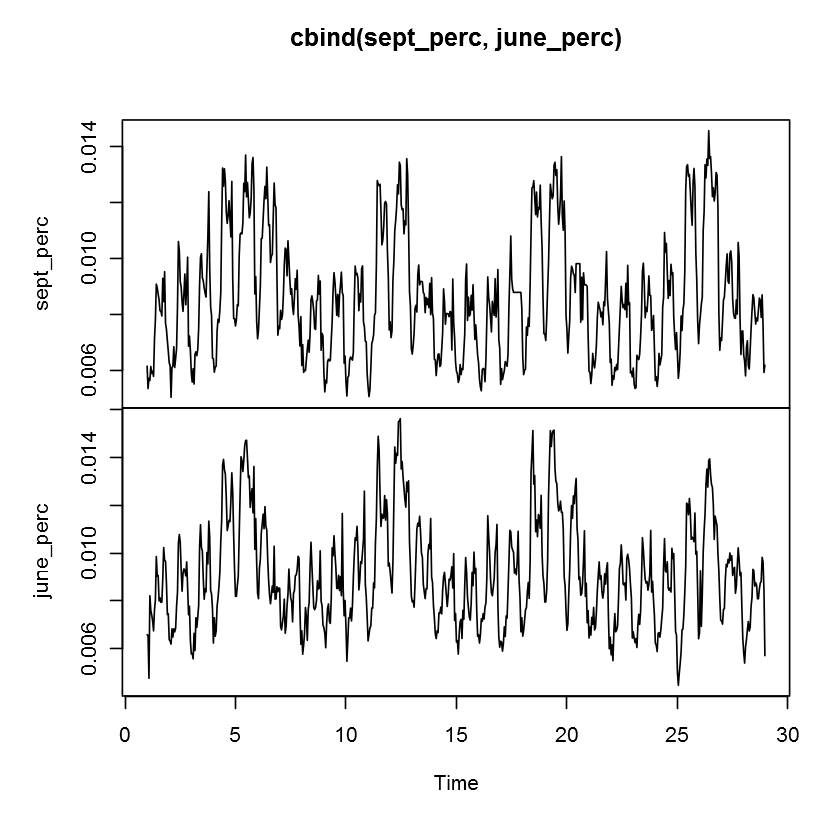

In [17]:
plot.ts(cbind(sept_perc, june_perc))

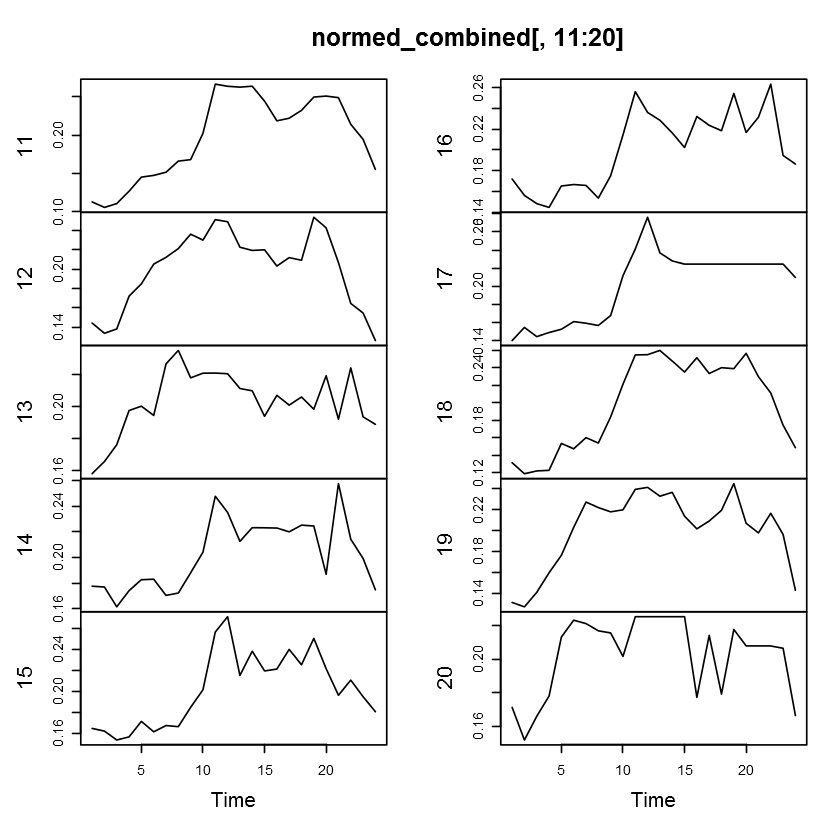

In [27]:
plot.ts(normed_combined[,11:20])

In [15]:
phase_diss = dissimilarity(as.matrix(combined), phase_dist(1))

Phase shift dissimilarity. Saturdays and Sundays have different phase.

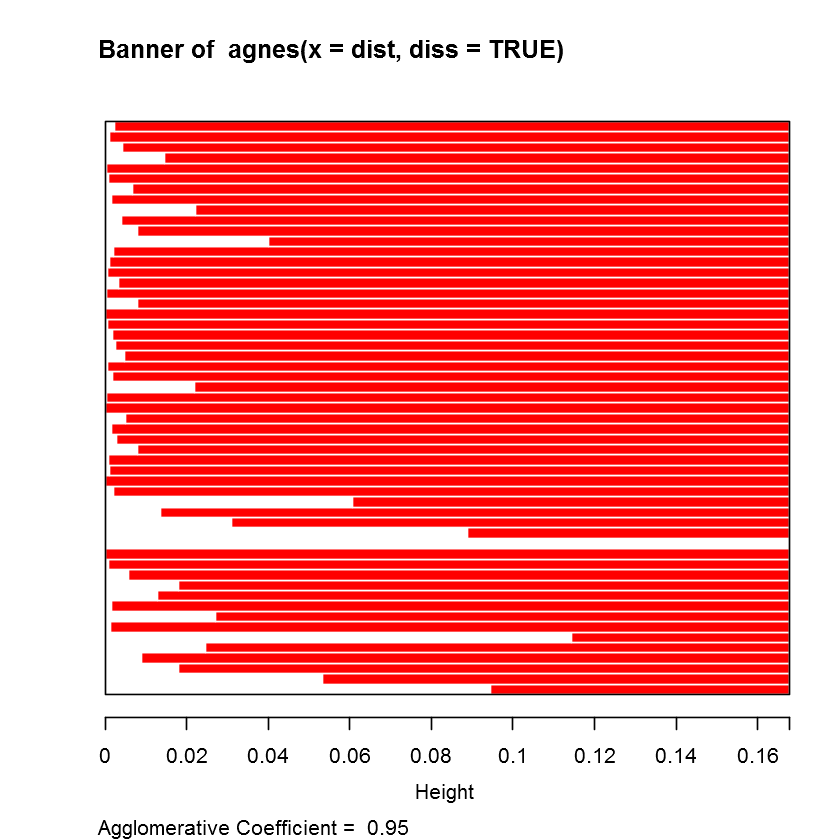

Medoids:
     ID   
[1,] 50 50
[2,] 13 13
Clustering vector:
 [1] 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1
[39] 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1
Objective function:
     build       swap 
0.03252116 0.02956686 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

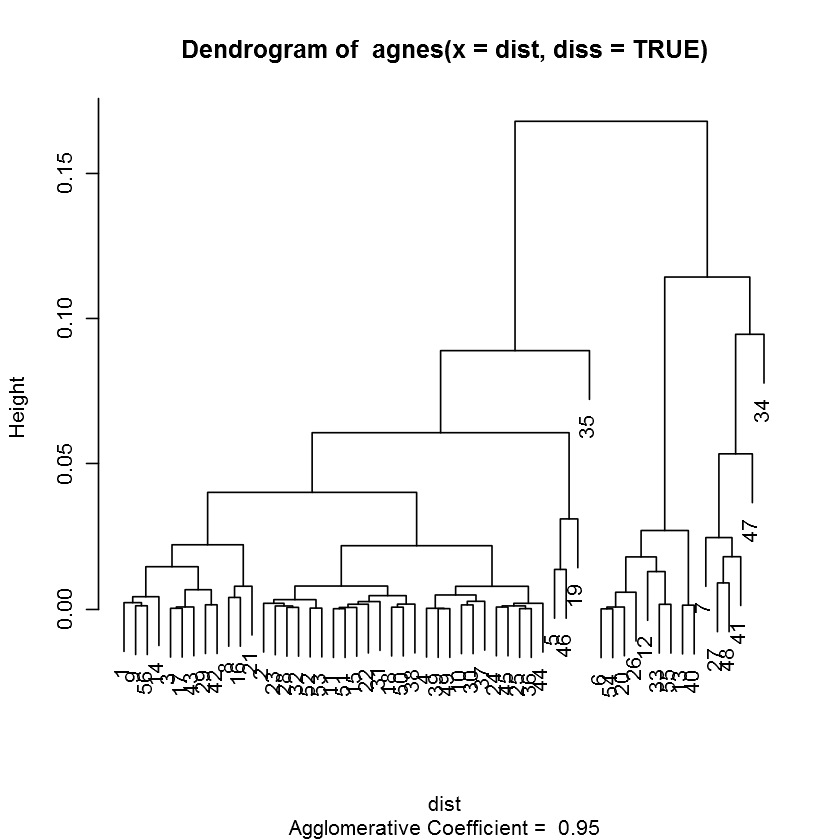

In [16]:
dist = phase_diss
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

In [19]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [20]:
weeks = data.frame(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4)

In [21]:
dpm = dissimilarity(as.matrix(weeks), daily_phase_dist(8))
rownames(dpm) = colnames(weeks)
colnames(dpm) = colnames(weeks)

ERROR: Error: could not find function "daily_phase_dist"


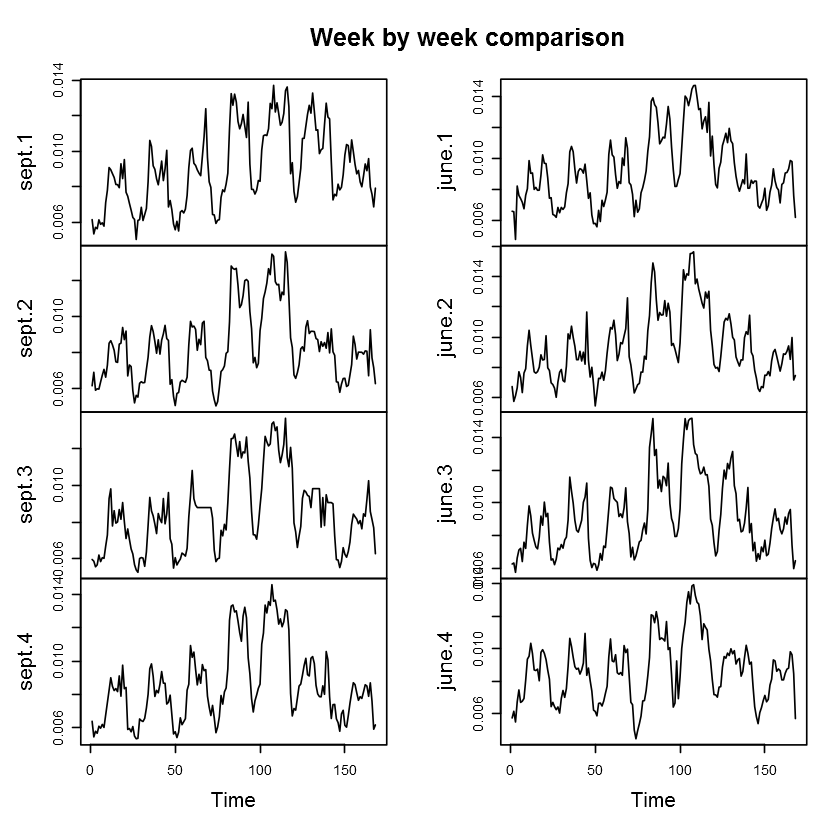

In [22]:
plot.ts(weeks, main='Week by week comparison')

We look at Euc dist between normalized days, basically comparing shape. Mostly Sunday/Monday sometimes Sat/Sun are clustered

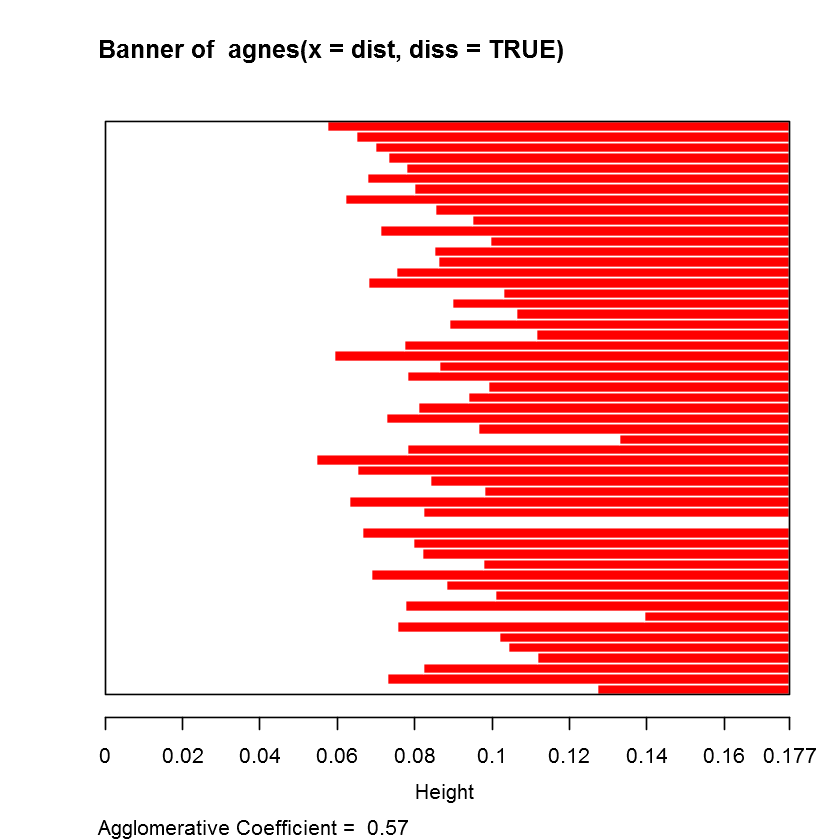

Medoids:
     ID        
[1,] "9"  "9"  
[2,] "55" "128"
Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   2   2   2   1   1   1   1   2   2   1   1   1   1   1   2   2 
 21  22  23  24  25  26  27  28 102 103 104 105 106 107 108 109 110 111 112 113 
  1   1   1   1   1   2   2   1   1   1   1   1   2   2   1   1   1   1   1   2 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 
  2   1   1   1   1   1   2   2   1   1   1   1   1   2   2   1 
Objective function:
     build       swap 
0.09339126 0.09218106 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

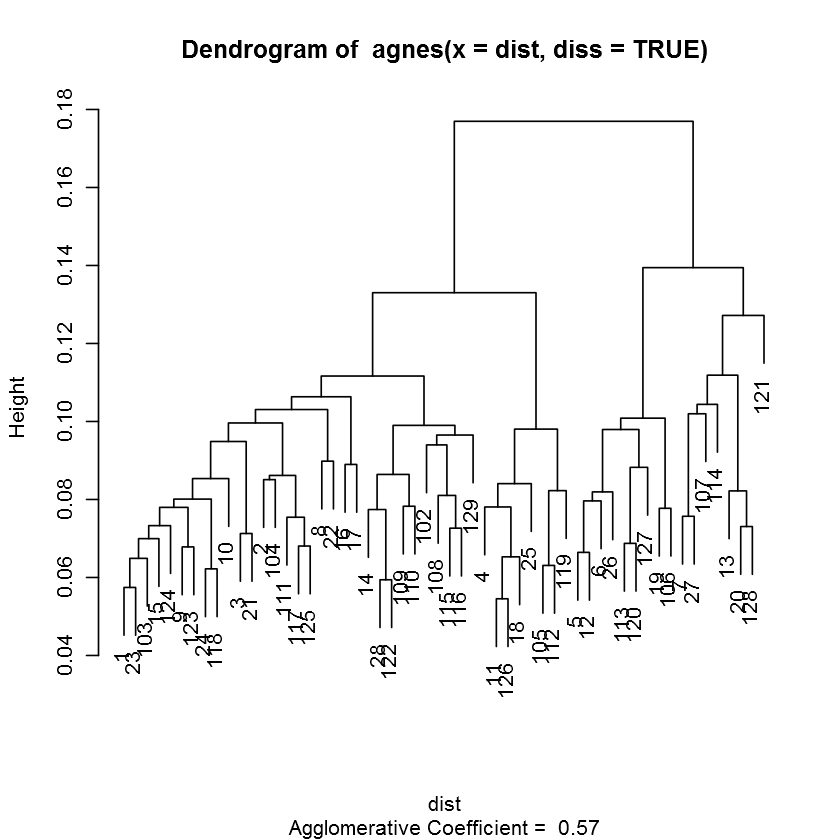

In [26]:
dist = diss(normed_combined, METHOD='EUCL')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

Dynamic time warping. Seperates out Sunday/Monday/Tuesday

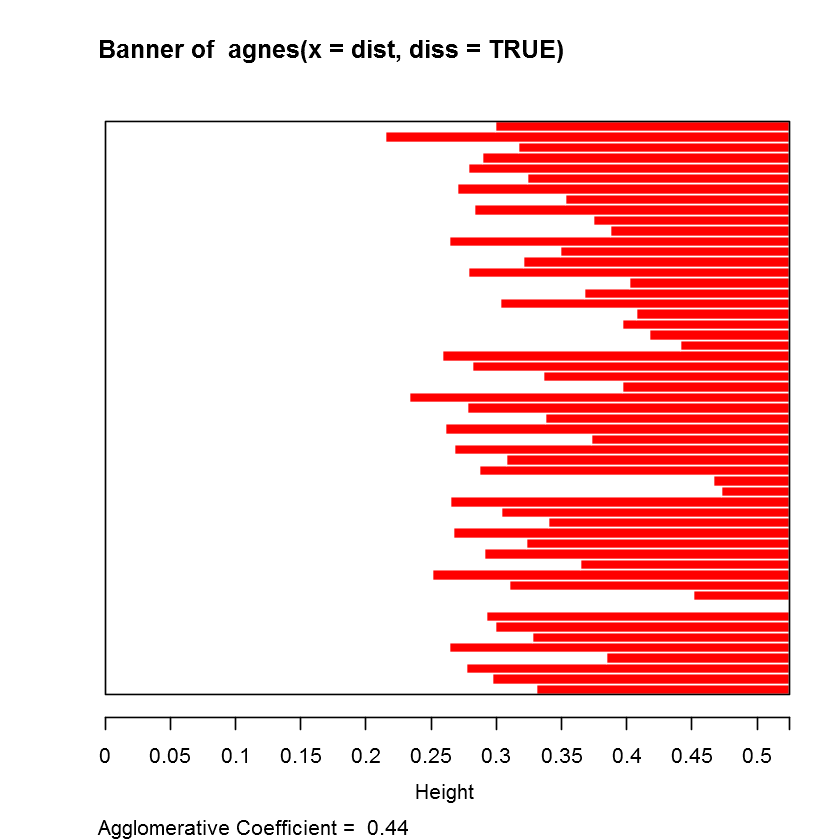

Medoids:
     ID        
[1,] "51" "124"
[2,] "32" "105"
[3,] "6"  "6"  
[4,] "42" "115"
Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   2   2   3   3   4   4   2   1   2   3   4   1   1   1   1   2   3   1 
 21  22  23  24  25  26  27  28 102 103 104 105 106 107 108 109 110 111 112 113 
  1   4   1   2   2   3   4   4   4   1   1   2   3   3   4   1   1   3   2   3 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 
  4   4   4   1   1   2   3   3   4   3   1   1   2   3   3   3 
Objective function:
    build      swap 
0.3041836 0.3025458 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

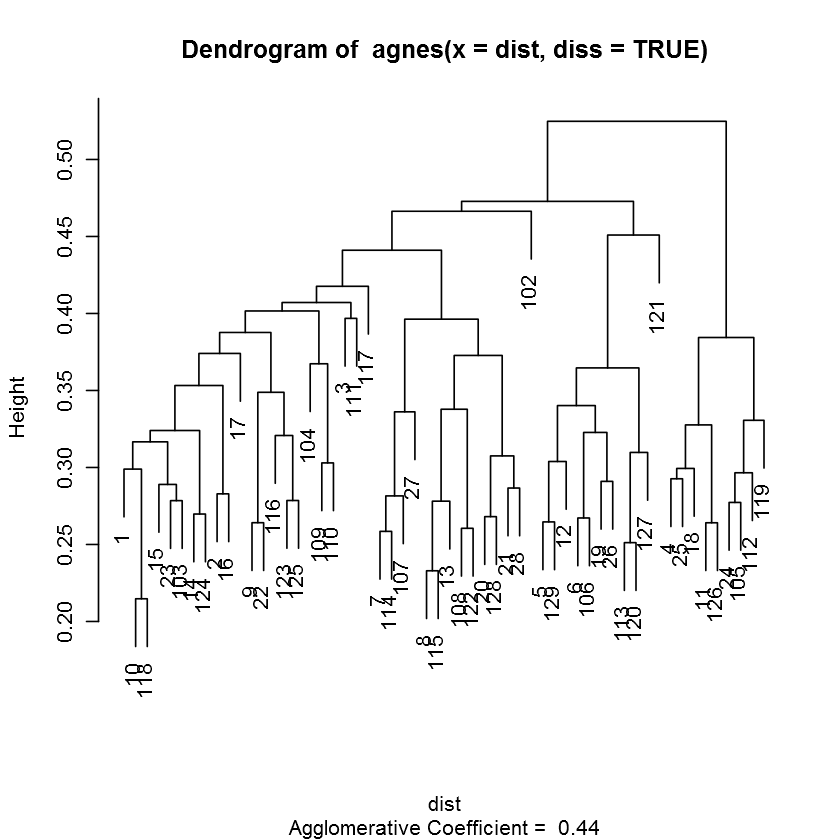

In [33]:
dist = diss(normed_combined, METHOD='DTW')
plot(agnes(dist, diss=TRUE))
pam(dist, 4, diss=TRUE)